In [2]:
%pip install -U textblob


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install vaderSentiment
%pip install tabulate
%pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Shyam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


In [7]:
import spacy
import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Textblob

TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

https://textblob.readthedocs.io/en/dev/

In [8]:
tb = TextBlob("Apple is a great company.")
print(tb.sentiment)
print(tb.tags)

Sentiment(polarity=0.8, subjectivity=0.75)
[('Apple', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('company', 'NN')]


In [9]:
tb2 = TextBlob("The first season of this show was brilliant and meaningful drama. It had true intellectual depth to it and managed to more than once deliver a real surprise. There were interesting characters and some exceptional acting. But that first season really told all the story there was to tell. All the good story at least.")
print(tb2.sentiment)

Sentiment(polarity=0.3583333333333334, subjectivity=0.4797619047619048)


In [10]:
tb.tags

[('Apple', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('company', 'NN')]

In [11]:
tb.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

# Fun with Spacy

### NER/Part of speech tagging

In [13]:
from spacy import displacy

# Download the spaCy model
!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
   print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

displacy.render(doc, style="dep")
displacy.render(doc, style="ent")

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 11.2 MB/s eta 0:00:01
     --------------- ------------------------ 5.0/12.8 MB 13.7 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 14.4 MB/s eta 0:00:01
     ----------------------------------- --- 11.5/12.8 MB 14.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP nsubj X.X. False False
startup startup VERB VBD ccomp xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False


In [14]:
doc = nlp("Thuan Pham, hired as Uber’s chief technology officer by former CEO Travis Kalanick back in 2013, is leaving the company in three weeks, the ride-share giant revealed today in an SEC filing that came out just as The Information reported that massive layoffs at Uber are being proposed to preserve some of the company’s dwindling capital reserves.")
displacy.render(doc, style="ent")

# Vader 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

https://pypi.org/project/vaderSentiment/

In [15]:
vader = SentimentIntensityAnalyzer()
temp3 = vader.polarity_scores("Textblob is amazingly simple to use. What great fun!")

In [16]:
temp3

{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.8268}

In [18]:
# Load in the dataframe
df = pd.read_csv("IMDB_Dataset.csv")

In [19]:
df.axes

[RangeIndex(start=0, stop=50000, step=1),
 Index(['review', 'sentiment'], dtype='object')]

In [20]:
print(df.review[0], df.sentiment[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [21]:
len(df)

50000

In [22]:
df[0:10].head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [23]:
def detect_tb_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_tb_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def detect_vader_neg(text):
    return vader.polarity_scores(text)['neg']

def detect_vader_comp(text):
    return vader.polarity_scores(text)['compound']

In [24]:
vader.polarity_scores(df.review[0])

{'neg': 0.179, 'neu': 0.756, 'pos': 0.064, 'compound': -0.9916}

In [25]:
print(df.review[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [27]:
df_sample = df[0:1000].copy()
df_sample['tb_polarity'] = df_sample.review.apply(detect_tb_polarity)
df_sample['tb_subjectivity'] = df_sample.review.apply(detect_tb_subjectivity)

def detect_vader_pos(text):
	return vader.polarity_scores(text)['pos']

df_sample['vader_pos'] = df_sample.review.apply(detect_vader_pos)
df_sample['vader_neg'] = df_sample.review.apply(detect_vader_neg)
df_sample['vader_comp'] = df_sample.review.apply(detect_vader_comp)

In [28]:
df_sample.head(25)

,review,sentiment,tb_polarity,tb_subjectivity,vader_pos,vader_neg,vader_comp
0,One of the other reviewers has mentioned that ...,positive,0.023433,0.490369,0.064,0.179,-0.9916
1,A wonderful little production. <br /><br />The...,positive,0.109722,0.559343,0.176,0.052,0.9670
2,I thought this was a wonderful way to spend ti...,positive,0.354008,0.658730,0.198,0.114,0.9519
3,Basically there's a family where a little boy ...,negative,-0.057813,0.454167,0.059,0.125,-0.9213
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.217952,0.452916,0.144,0.050,0.9744
5,"Probably my all-time favorite movie, a story o...",positive,0.155294,0.570392,0.217,0.017,0.9828
6,I sure would like to see a resurrection of a u...,positive,0.285522,0.475196,0.098,0.023,0.9022
7,"This show was an amazing, fresh & innovative i...",negative,0.082716,0.587654,0.189,0.140,0.8730
8,Encouraged by the positive comments about this...,negative,-0.142863,0.754147,0.162,0.156,0.2362
9,If you like original gut wrenching laughter yo...,positive,0.415000,0.550000,0.432,0.088,0.9507


In [29]:
modelLR1 = LogisticRegression()

modelLR1.fit(df_sample.iloc[:,2:6], df_sample.iloc[:,1])

LogisticRegression()

In [30]:
sent_pred = modelLR1.predict(df_sample.iloc[:,2:6])
confusion_matrix(df_sample.sentiment, sent_pred)
print("F1 score:", f1_score(df_sample.sentiment, sent_pred, average='micro'))

F1 score: 0.786


In [31]:
np.corrcoef(df_sample.vader_comp, df_sample.tb_polarity)[0,1]

np.float64(0.5928418967480803)

In [32]:
sns.set(style="whitegrid")

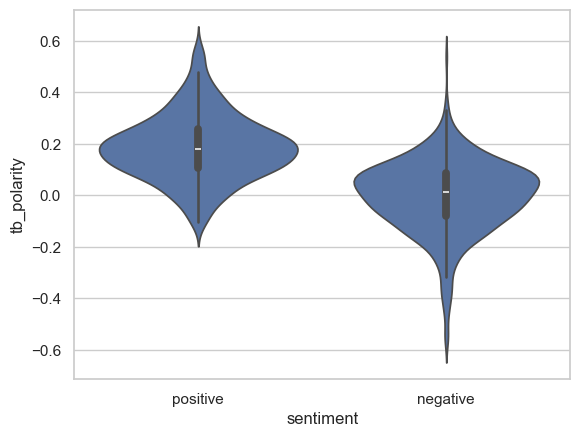

In [33]:
ax = sns.violinplot(x="sentiment", y="tb_polarity", data=df_sample)

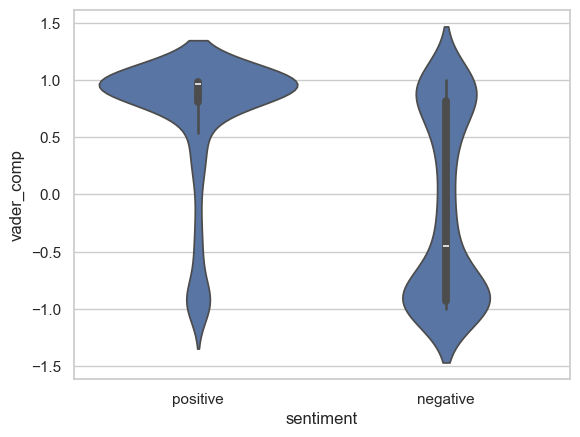

In [34]:
ax = sns.violinplot(x="sentiment", y="vader_comp", data=df_sample)

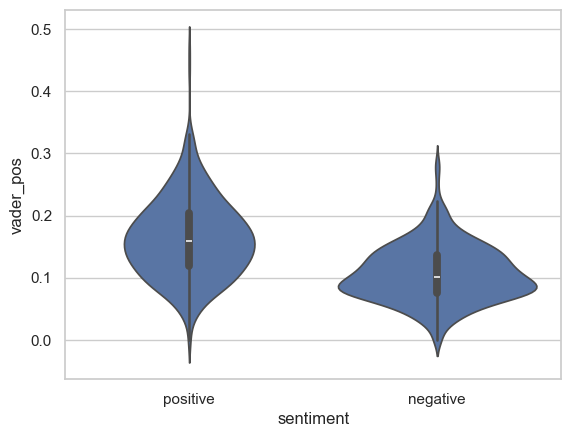

In [35]:
ax = sns.violinplot(x="sentiment", y="vader_pos", data=df_sample)

In [36]:
tb_pred = pd.cut(df_sample['tb_polarity'], bins=2, labels=["negative", "positive"])

In [37]:
print("Confusion Matrix:\n", confusion_matrix(df_sample.sentiment, tb_pred))
print("F1 score:", f1_score(df_sample.sentiment, tb_pred, average='micro'))

Confusion Matrix:
 [[241 258]
 [ 38 463]]
F1 score: 0.704


In [38]:
v_pred = np.where(df_sample['vader_comp'] > 0.0, "positive", "negative")

In [39]:
print("Confusion Matrix:\n", confusion_matrix(df_sample.sentiment, v_pred))
print("F1 score:", f1_score(df_sample.sentiment, v_pred, average='micro'))

Confusion Matrix:
 [[286 213]
 [ 68 433]]
F1 score: 0.719


## Datasets
Here, 70% of the original data are used for training models, and the rest are for test

In [40]:
df_sample = df[0:1000].copy()
train_sample = int(len(df_sample)*0.7)
train = df_sample[0:(train_sample)]
test = df_sample[(train_sample+1):len(df_sample)]
print('train data size:', len(train))
print('test data size:', len(test))

train data size: 700
test data size: 299


In [41]:
tv = TfidfVectorizer(stop_words='english', lowercase=True);
tv.fit(train.review)

TfidfVectorizer(stop_words='english')

In [42]:
modelNB = MultinomialNB(alpha=1)
modelNB.fit(tv.transform(train.review), train.sentiment)

MultinomialNB(alpha=1)

In [43]:
nb_pred = modelNB.predict(tv.transform(test.review))

print("Confusion Matrix:\n", confusion_matrix(test.sentiment, nb_pred))
print("F1 score:", f1_score(test.sentiment, nb_pred, average='micro'))

Confusion Matrix:
 [[132   4]
 [ 79  84]]
F1 score: 0.7224080267558528


In [44]:
modelLR = LogisticRegression(C=1, solver='liblinear')
modelLR.fit(tv.transform(train.review), train.sentiment)

lr_pred = modelLR.predict(tv.transform(test.review))

print("Confusion Matrix:\n", confusion_matrix(test.sentiment, lr_pred))
print("F1 score:", f1_score(test.sentiment, lr_pred, average='micro'))

Confusion Matrix:
 [[123  13]
 [ 45 118]]
F1 score: 0.8060200668896321


## Understandig emotions

In [46]:
# Load in the dataframe
df_emotions = pd.read_csv("emotions.csv")

In [47]:
df_emotions.head(25)

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
5,worry,Re-pinging @ghostridah14: why didn't you go to...
6,sadness,"I should be sleep, but im not! thinking about ..."
7,worry,Hmmm. http://www.djhero.com/ is down
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?


In [48]:
df_emotions.sentiment.unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [49]:
len(df_emotions)

30000

In [50]:
# Create the test and training sets

train_samples = int(len(df_emotions)*0.8)

train = df_emotions[0:train_samples]
test = df_emotions[train_samples+1:len(df_emotions)]
print('train data size:', len(train))
print('test data size:', len(test))

train data size: 24000
test data size: 5999


<Axes: xlabel='sentiment'>

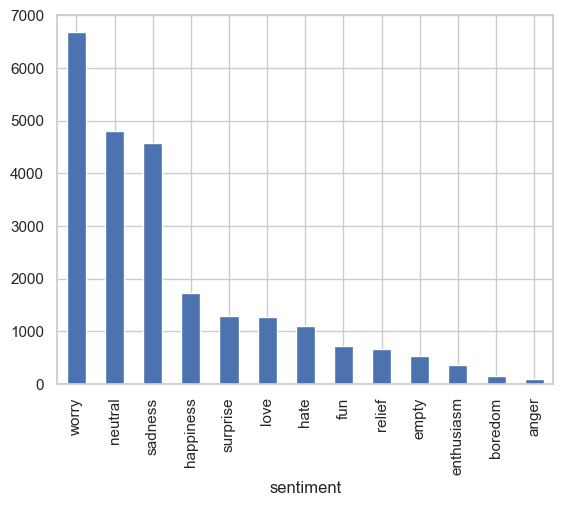

In [51]:
#Some descriptive analysis
train['sentiment'].value_counts().plot(kind='bar')

<Axes: xlabel='sentiment'>

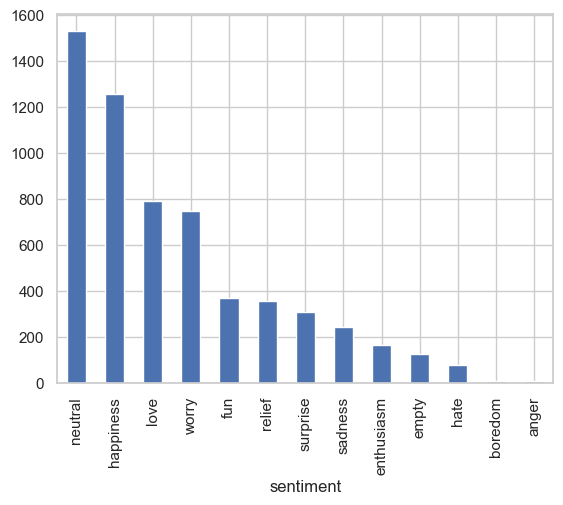

In [52]:
#Some descriptive analysis
test['sentiment'].value_counts().plot(kind='bar')

In [53]:
tv = TfidfVectorizer(ngram_range=(1,3), stop_words='english')
tv.fit(train.content)

#modelELR = LogisticRegression(C=0.1)
modelELR = MultinomialNB(alpha=0.1)
modelELR.fit(tv.transform(train.content), train.sentiment)


MultinomialNB(alpha=0.1)

In [54]:
elr_pred = modelELR.predict(tv.transform(train.content))

print("Confusion Matrix:\n", confusion_matrix(train.sentiment, elr_pred))
print("F1 score:", f1_score(train.sentiment, elr_pred, average='micro'))

Confusion Matrix:
 [[  47    0    0    0    0    0    0    0   10    0    8    0   24]
 [   0   88    0    0    0    1    0    0   11    0   16    0   30]
 [   0    0  451    0    0    1    0    1   24    0   16    0   40]
 [   0    0    0  313    0    2    0    0   15    0    7    0   21]
 [   0    0    0    0  684    5    0    1    9    0    5    0   12]
 [   0    0    0    0    0 1704    0    0   11    0    5    0   10]
 [   0    0    0    0    0    0 1078    0    3    0   12    0   15]
 [   0    0    0    0    0    5    0 1246    5    0    5    0   15]
 [   0    0    0    0    0    4    0    0 4706    0   13    0   87]
 [   0    0    0    0    0    0    1    0   11  619    8    0   25]
 [   0    0    0    0    0    0    0    0   15    0 4494    0   75]
 [   0    0    0    0    0    1    0    0   14    0   10 1246   31]
 [   0    0    0    0    0    1    0    0   11    0    9    1 6662]]
F1 score: 0.9724166666666667


In [55]:
print(train.content[20])
modelELR.predict(tv.transform(train.content[20:21]))

@raaaaaaek oh too bad! I hope it gets better. I've been having sleep issues lately too


array(['worry'], dtype='<U10')

In [56]:
print(train.content[40])
modelELR.predict(tv.transform(train.content[40:41]))

mmm much better day... so far! it's still quite early. last day of #uds


array(['happiness'], dtype='<U10')

In [57]:
def plot_confusion_matrix(preds, labels):
  class_labels = np.unique(df_emotions.sentiment)
  class_size = len(class_labels)
  cnf_mat = confusion_matrix(labels, preds, class_labels)                            #Computes confusion_matrix
  cnf_mat = cnf_mat.astype('float') / (cnf_mat.sum(axis=1)[:, np.newaxis]+1)
  plt.imshow(cnf_mat, interpolation='nearest', cmap=plt.cm.Blues)
  #plt.xticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.xticks(np.arange(class_size), labels=class_labels, rotation='vertical')
  plt.yticks(np.arange(class_size), labels=class_labels)
  #plt.yticks(np.arange(class_size), np.arange(1, class_size + 1), class_labels)
  plt.title('Confusion matrix of the classifier')
  plt.xlabel('True Label')
  plt.ylabel('Predicted Label')
  plt.title('Confusion Matrix')
  plt.colorbar()
  plt.show()

In [58]:
plot_confusion_matrix(train.sentiment, elr_pred)

TypeError: too many positional arguments

In [ ]:
elr_pred = modelELR.predict(tv.transform(test.content))

print("Confusion Matrix:\n", confusion_matrix(test.sentiment, elr_pred))
print("F1 score:", f1_score(test.sentiment, elr_pred, average='micro'))

In [ ]:
plot_confusion_matrix(test.sentiment, elr_pred)